### **State University of Campinas - UNICAMP** </br>
**Course**: MC886A </br>
**Professor**: Marcelo da Silva Reis </br>
**TA (PED)**: Marcos Vinicius Souza Freire

---

**Student 1**:

**RA 1**:

**Student 2**:

**RA 2**:

---

### **Assignment 1: MC886A**
##### Notebook: mc886_1s2025-assignment_1.ipynb

---

Dear Students, welcome to MC886!!!

**You've Got This!** 🤗  

Now that you are building a strong foundation in regression and classification through the first lectures, it's time to put your skills into action with this notebook! Remember, the goal isn't just to "get the code running" but to **deeply understand** how these algorithms work under the hood.  

- **For the Linear Regression section:**  
  Implementing the Linear Regressor manually might feel tricky at first, but trust the process. Every line of code you write, from initializing weights to updating gradients, is a step toward mastering the core of machine learning. Compare your results with PyTorch's implementation to see how theory translates into powerful frameworks!  

- **For the KNN Classifier:**  
  Building a classifier from scratch will test your problem-solving skills. Don’t worry if your first attempt isn't perfect, debugging is part of the journey!  

**Pro Tips:**  
1. Use the visualizations and mutual information analysis to guide your feature engineering.  
2. When stuck, revisit the math behind MSE, MAE, and R². They're not just metrics, but tools to evaluate your model's "story". Also, remember to discuss the implementation with your pair. Don't hesitate in reaching the TA ("PED") via Discord (https://discord.gg/ArdB8FtBcq).   
3. Celebrate small wins! Got your manual linear regressor to train? That's a victory.  

**Remember:**  
Machine learning is a marathon, not a sprint. Struggling with a concept? That's where the real learning happens. You're not just writing code, you're training your brain to think like a data scientist.  

Let curiosity drive you, and don't hesitate to ask questions.

🌅 **Go make those models shine!** 🚀  

---

### **Table of Contents**

1. [**Objective**](#objective) </br>
2. [**Linear Regression**](#linear-regression) </br>
3. [**Data analysis and preprocessing**](#data-analysis-and-preprocessing) </br>
4. [**Implement and train a Linear Regressor**](#implement-and-train-a-linear-regressor) </br>
5. [**Compare with PyTorch Linear Regression**](#compare-with-pytorch-linear-regression) </br>
6. [**Find interaction terms**](#find-interaction-terms) </br>
7. [**K-Nearest Neighbors (KNN) Classifier**](#k-nearest-neighbors-knn-classifier) </br>
8. [**Data analysis and preprocessing**](#data-analysis-and-preprocessing) </br>
9. [**Train a K-Nearest Neighbors Classifier**](#train-a-k-nearest-neighbors-classifier) </br>
10. [**Multiclass Classification**](#multiclass-classification) </br>
11. [**REFERENCES**](#references)

---

##### **Objective:**

To explore **Linear Regression** and **K-Nearest Neighbors** alternatives and come up with the best possible model for the problems. In this work, we will train two models for regression (one manual and one using PyTorch) and one for multiclass classification using PyTorch.

---

#### **Linear Regression**

In this section, you must load and explore the dataset, and build a linear regressor by hand. **No machine learning libraries are allowed for this implementation**. After building your own regressor, you must compare it with a PyTorch-based linear regression model.

##### **Dataset: Life Expectancy Data (Rajarshi *et al.*, 2018)[1]**

This dataset contains health and socio-economic factors collected across various countries over multiple years, with the goal of predicting life expectancy.

Understanding life expectancy helps countries to allocate resources effectively and identify key factors influencing public health. This dataset was collected to study how various health, economic, and social indicators impact life expectancy.

Features and their descriptions:
- **Year**: Year of the sample
- **Status**: Development status of the country (Developed/Developing)
- **Life expectancy (TARGET)**: Average life expectancy at birth (in years)
- **Adult Mortality**: Probability of dying between 15 and 60 years per 1000 population
- **infant deaths**: Number of infant deaths per 1000 population
- **Alcohol**: Per capita alcohol consumption (in liters of pure alcohol)
- **percentage expenditure**: Expenditure on health as a percentage of GDP
- **Hepatitis B**: Hepatitis B immunization coverage among 1-year-olds (%)
- **Measles**: Number of reported measles cases per 1000 population
- **BMI**: Average Body Mass Index of the population
- **under-five deaths**: Number of under-five deaths per 1000 population
- **Polio**: Polio immunization coverage among 1-year-olds (%)
- **Total expenditure**: General government expenditure on health as a percentage of total government expenditure
- **Diphtheria**: Diphtheria immunization coverage among 1-year-olds (%)
- **HIV/AIDS**: Deaths per 1000 live births due to HIV/AIDS (0-4 years)
- **GDP**: Gross Domestic Product per capita (in USD)
- **Population**: Population of the country
- **thinness 1-19 years**: Prevalence of thinness among children and adolescents aged 1-19 (%)
- **thinness 5-9 years**: Prevalence of thinness among children aged 5-9 (%)
- **Income composition of resources**: Human Development Index component for income (0-1 scale)
- **Schooling**: Average number of years of schooling

**How to load the dataset**

- For this task, we will load the dataset from a local CSV file. Ensure `life_expectancy_data.csv` is in your working directory or adjust the path accordingly.
- The dataset is located in `assignement_1/data/life_expectancy_data.csv`

---

In [1]:
# Import necessary libraries for data handling, visualization, and PyTorch-based modeling
import pandas as pd
import torch
import torch.nn as nn
from torchmetrics import MeanSquaredError, MeanAbsoluteError, R2Score, Accuracy, F1Score, ConfusionMatrix
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
### REMEMBER TO RE-VISIT THE NOTEBOOKS "00-setup.ipynb" and "01-pytorch-tensor_basics.ipynb", from our first hands-on, so you can set the right environment for you.

In [4]:
# Load dataset from a local CSV file
# Ensure the file "Life Expectancy Data.csv" is in the "data" folder within your working directory (RE-VISIT THE NOTEBOOKS "00-setup.ipynb" and "01-pytorch-tensor_basics.ipynb")
df = pd.read_csv("data/life_expectancy_data.csv")  # You may change this path

In [5]:
# Drop non-numeric or unnecessary columns
df = df.drop(["Country"], axis=1)  # Country names aren't directly usable

# Convert the categorical "Status" column (Developed/Developing) into numeric values
# Developed = 1, Developing = 0 (binary encoding)
df["Status"] = df["Status"].map({"Developed": 1, "Developing": 0})

# Handle missing values (fill with median for simplicity)
df = df.fillna(df.median())

In [6]:
# Define features (X) and target (y) for the regression task
# X: all columns except "Life expectancy" (the target)
# y: "Life expectancy" column, reshaped to a column vector for compatibility
X = torch.tensor(df.drop("Life expectancy", axis=1).values, dtype=torch.float32)
y = torch.tensor(df["Life expectancy"].values, dtype=torch.float32).view(-1, 1)

# Split the data into training and testing sets
train_size = int(0.8 * len(X)) # Example using 80%
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Compute normalization parameters using only the training data
X_train_mean = X_train.mean(dim=0)
X_train_std = X_train.std(dim=0)
y_train_mean = y_train.mean()
y_train_std = y_train.std()

# Normalize training and testing data using training parameters
X_train = (X_train - X_train_mean) / X_train_std
X_test = (X_test - X_train_mean) / X_train_std  # Use training mean and std
y_train = (y_train - y_train_mean) / y_train_std
y_test = (y_test - y_train_mean) / y_train_std  # Use training mean and std

#### **Data analysis and preprocessing**

$({1.5} \space point)$

Explore the dataset by plotting graphs of features you think are important to visualize their relationship with the target (`Life expectancy`). Use boxplots to understand feature distributions. There are no minimum/maximum requirements for graphs. Explore what helps you understand the dataset.

Check the dependencies between features and the target to identify which have the biggest impact (see the `mutual_information` section below).

The dataset has one categorical feature (`Status`) that has been encoded as binary (1=Developed, 0=Developing). Ensure all features are numeric and handle missing values appropriately.

Machine learning models are sensitive to the scale of input features, so normalization is applied above.

**Mutual Information**

Mutual information measures the dependency between variables and can help identify features strongly associated with `Life expectancy`. For this task, you may use [`mutual_info_regression`](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.mutual_info_regression.html) from Scikit-learn as an exploratory tool (an exception to the no-Scikit-learn rule for modeling).

In [7]:
import numpy as np
import plotly.express as px # Here I proposed Plotly, for interactive plots. You can use other libraries, such as Seaborn or Matplotlib, if you prefer.
from sklearn.feature_selection import mutual_info_regression

# Prepare raw data (before normalization) for mutual information calculation
X_raw = df.drop("Life expectancy", axis=1)
y_raw = df["Life expectancy"]

# Compute mutual information; "Year" (index 0)
mt_info = mutual_info_regression(X_raw, y_raw, discrete_features=[0])  # Year is is treated as discrete

# Create a Series for visualization
mt_info_df = pd.Series(mt_info, index=X_raw.columns)

# Plot mutual information as a bar chart using Plotly or other library of your choice
fig = px.bar(
    x=mt_info_df.index,
    y=mt_info_df.values,
    labels={'x': 'Features', 'y': 'Mutual Information'},
    title='Feature Importance',
    height=400,
    width=800
)
fig.update_layout(
    xaxis_tickangle=-45,
    xaxis_title="Features",
    yaxis_title="Mutual Information",
    bargap=0.2
)
fig.show()

In [8]:
df.corr()

,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
Year,1.000000,-0.001864,0.170819,-0.079535,-0.037415,-0.069147,0.031400,0.021302,-0.082493,0.108484,...,0.091388,0.074552,0.131373,-0.139741,0.091480,0.014027,-0.047827,-0.050859,0.236594,0.203517
Status,-0.001864,1.000000,0.481415,-0.314894,-0.112252,0.579662,0.454261,0.127008,-0.076955,0.309371,...,0.218628,0.290431,0.215281,-0.148590,0.445981,-0.037606,-0.365814,-0.364179,0.460677,0.492984
Life expectancy,0.170819,0.481415,1.000000,-0.696390,-0.196769,0.388918,0.381418,0.170219,-0.157767,0.556901,...,0.458399,0.208844,0.472211,-0.556703,0.430461,-0.029014,-0.468002,-0.462473,0.688662,0.713054
Adult Mortality,-0.079535,-0.314894,-0.696390,1.000000,0.078890,-0.190191,-0.242628,-0.123287,0.031293,-0.379092,...,-0.270002,-0.111796,-0.270301,0.523886,-0.281434,-0.005292,0.296135,0.301634,-0.436332,-0.433415
infant deaths,-0.037415,-0.112252,-0.196769,0.078890,1.000000,-0.112918,-0.085612,-0.167421,0.501128,-0.226796,...,-0.170896,-0.126268,-0.175376,0.025231,-0.102829,0.551667,0.464811,0.470445,-0.141571,-0.190951
Alcohol,-0.069147,0.579662,0.388918,-0.190191,-0.112918,1.000000,0.344410,0.090850,-0.049752,0.313022,...,0.211744,0.296153,0.212388,-0.046235,0.313060,-0.026836,-0.413021,-0.402034,0.418372,0.498899
percentage expenditure,0.031400,0.454261,0.381418,-0.242628,-0.085612,0.344410,1.000000,0.039528,-0.056596,0.227408,...,0.146148,0.175559,0.142506,-0.097857,0.901819,-0.016888,-0.249610,-0.251144,0.374730,0.386076
Hepatitis B,0.021302,0.127008,0.170219,-0.123287,-0.167421,0.090850,0.039528,1.000000,-0.073021,0.112441,...,0.364890,0.055988,0.449151,-0.085497,0.076660,-0.125006,-0.097576,-0.100576,0.117652,0.141275
Measles,-0.082493,-0.076955,-0.157767,0.031293,0.501128,-0.049752,-0.056596,-0.073021,1.000000,-0.176069,...,-0.136669,-0.104133,-0.142385,0.030899,-0.069253,0.237188,0.224870,0.221138,-0.111089,-0.120799
BMI,0.108484,0.309371,0.556901,-0.379092,-0.226796,0.313022,0.227408,0.112441,-0.176069,1.000000,...,0.281260,0.230745,0.280267,-0.243383,0.273932,-0.069667,-0.532487,-0.539365,0.471947,0.499806


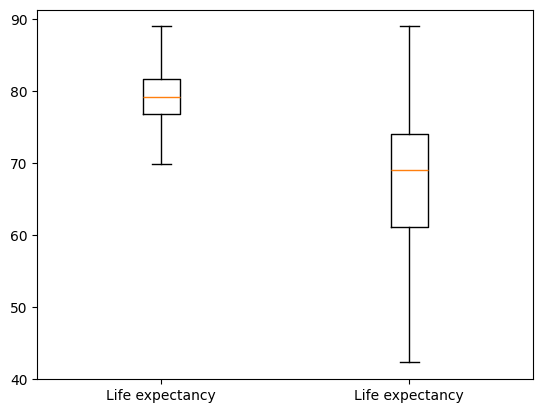

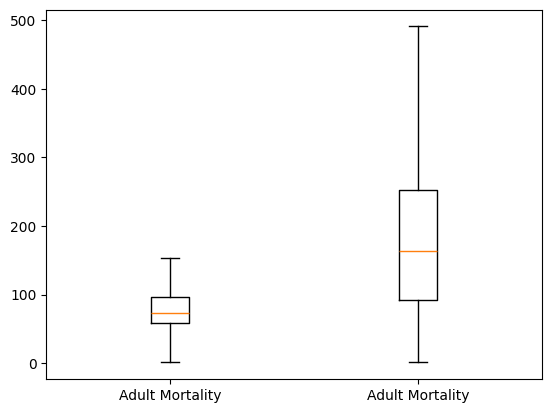

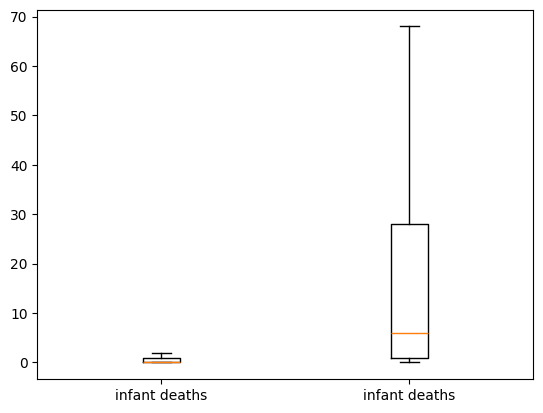

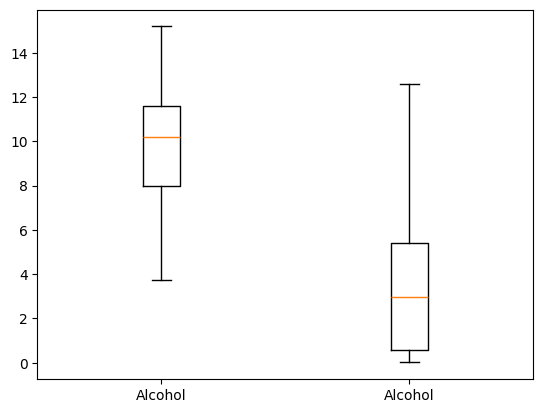

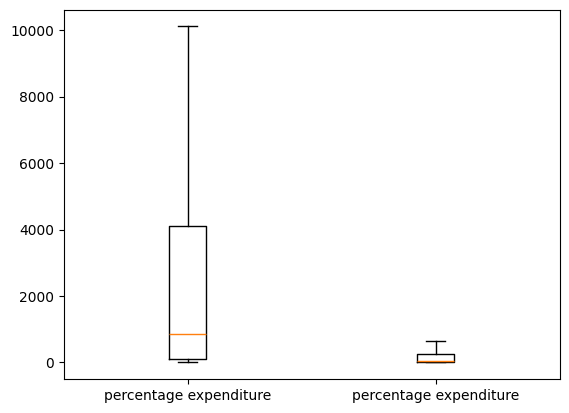

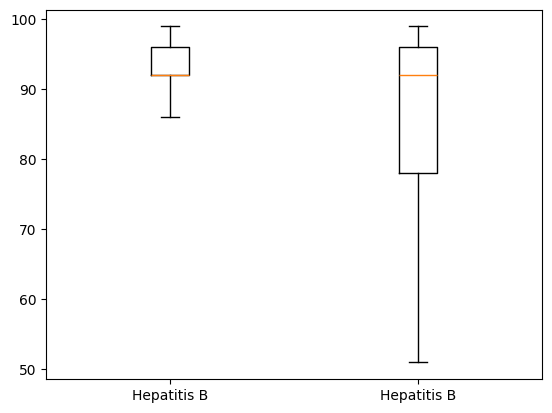

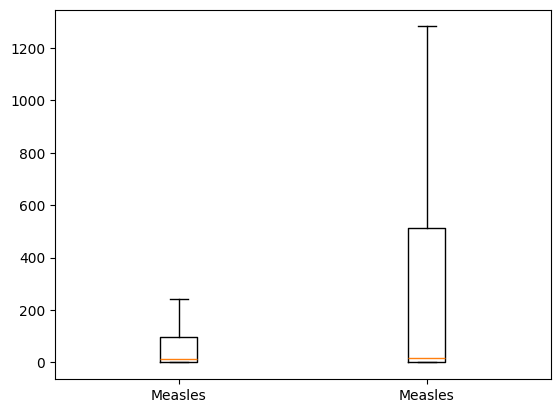

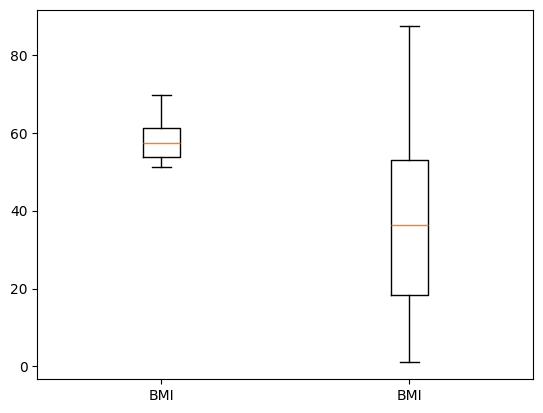

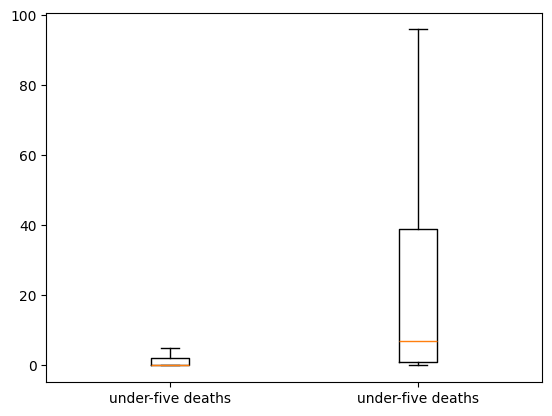

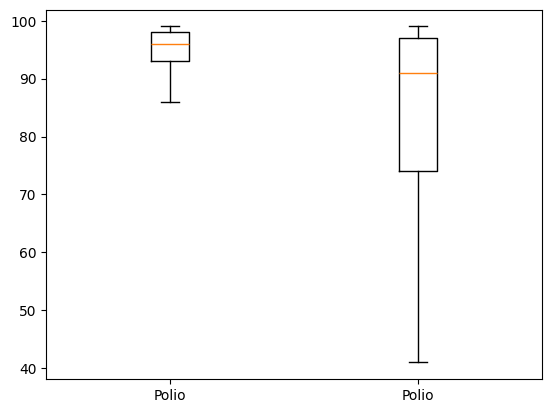

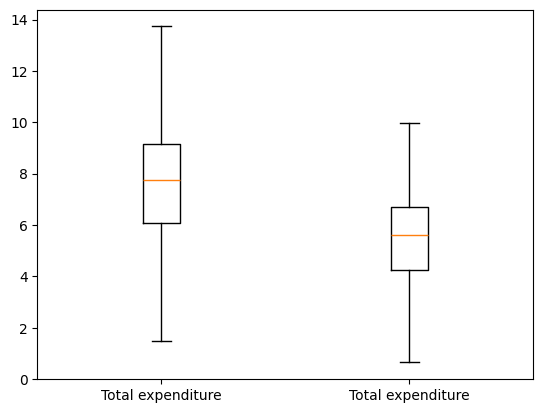

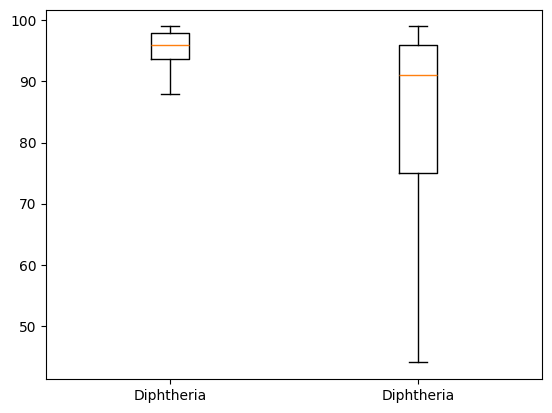

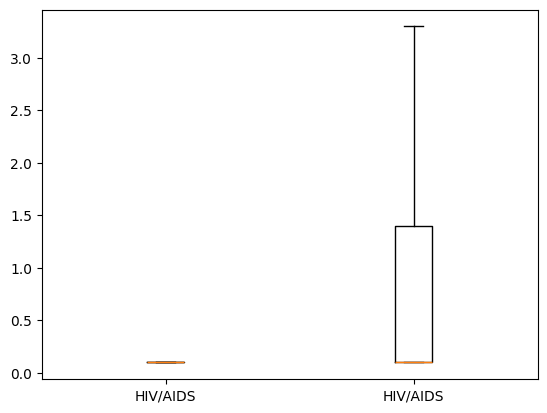

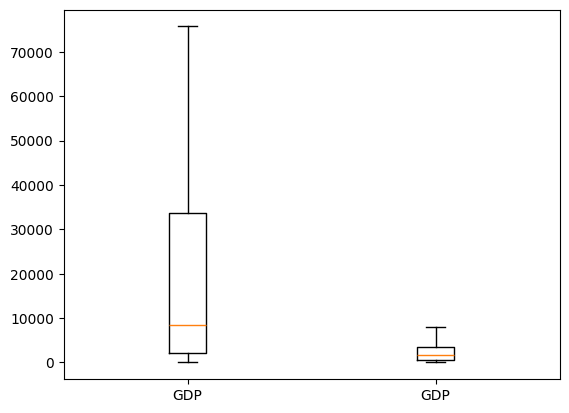

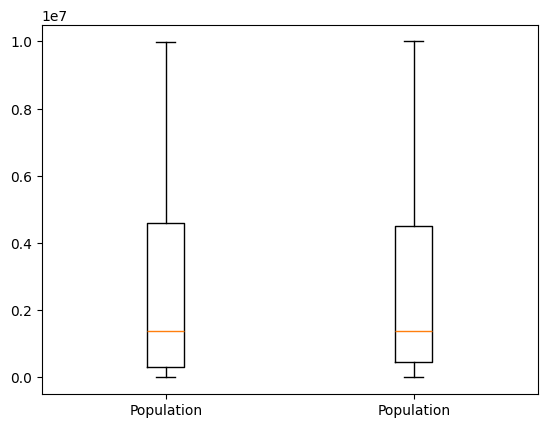

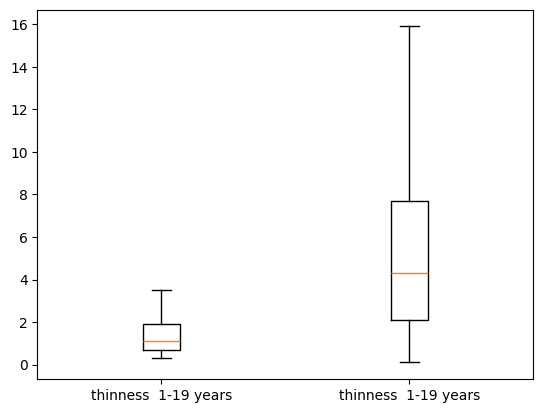

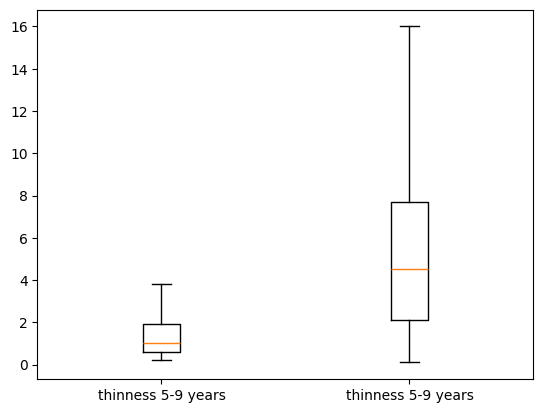

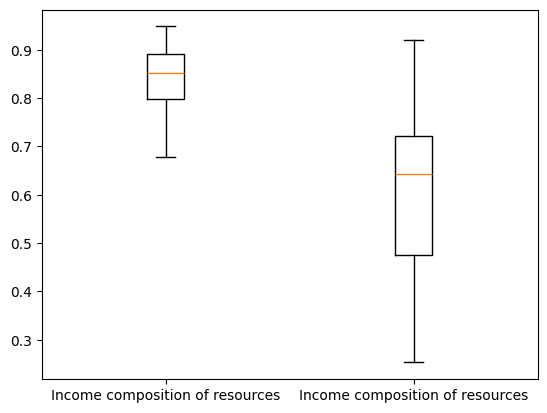

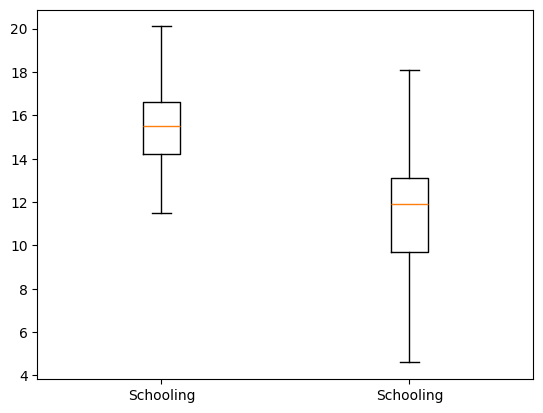

In [9]:
query_developed = df.query("Status == 1").drop(["Status", "Year"], axis=1)
query_undeveloped = df.query("Status == 0").drop(["Status", "Year"], axis=1)

for q in query_developed.axes[1]:
    plt.boxplot([query_developed[q], query_undeveloped[q]], tick_labels=[q, q], showfliers=False)
    plt.show()

---

##### **Discussion of key points**
- How did the visualization help in understanding the data?
- Looking at the mutual information plot, can you find features that seem uninfluential? (If so, consider removing them before proceeding!)

*YOUR ANSWER HERE*

##### **Implement and train a Linear Regressor**

$({2.5} \space points)$

Complete the implementation of the `MyLinearRegressor` class and the `MSE` metric below. No machine learning libraries are allowed for these.

Evaluate performance using Mean Squared Error ($MSE$), Mean Absolute Error ($MAE$), and Coefficient of Determination ($R^{2}$) from [`torchmetrics`](https://lightning.ai/docs/torchmetrics/stable/).

*P.S.: You don't need to build anything using Lightning to implement the metrics from TorchMetrics.*

In [ ]:
# TASK: MSE. You cannot use machine learning libraries for this!!
# Mean Squared Error (MSE)
def MSE(y_true, y_pred):
    return torch.mean((y_true - y_pred) ** 2)

# TASK: MAE. You cannot use machine learning libraries for this!!
# Mean Absolute Error (MAE)

# TASK: R^2. You cannot use machine learning libraries for this!!
# Coefficient of Determination (R^2)

# Custom Linear Regression class (manual implementation)
class MyLinearRegressor:
    def __init__(self, learning_rate=0.01, max_iter=1000):
        self.max_iter = max_iter
        self.learning_rate = learning_rate
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        # Initialize weights and bias to zeros
        n_samples, n_features = X.shape
        self.weights = torch.zeros(n_features, 1, dtype=torch.float32)
        self.bias = torch.zeros(1, dtype=torch.float32)

        # Gradient descent loop
        for _ in range(self.max_iter):
            y_pred = self.predict(X)
            grad_w = (2 / n_samples) * X.T @ (y_pred - y)
            grad_b = (2 / n_samples) * torch.sum(y_pred - y)
            # Update weights and bias by stepping in the opposite direction of the gradient
            self.weights -= self.learning_rate * grad_w
            self.bias -= self.learning_rate * grad_b

    def predict(self, X):
        # Linear equation: y = X * weights + bias
        return X @ self.weights + self.bias

# Train the manual regressor on the training data
regressor = MyLinearRegressor(learning_rate=0.01, max_iter=1000)
regressor.fit(X_train, y_train)
y_pred_manual = regressor.predict(X_test)

#### **Discussion of key points**
- Which of the proposed metrics $(MSE, MAE, R^{2})$ is best for this problem? Why?
- Did your Linear Regressor accurately estimate life expectancy? Justify using a metric.
- What do you think is the biggest error type in your model: variance or bias?

*YOUR ANSWER HERE*

##### **Compare with PyTorch Linear Regression**

$({0.5} \space point)$

Train a PyTorch-based linear regression model and compare it with your manual implementation.

In [ ]:
# PyTorch-based Linear Regression class
class LinearRegression(nn.Module):
    def __init__(self, input_dim):
        super(LinearRegression, self).__init__()
        self.linear = nn.Linear(input_dim, 1)

    def forward(self, x):
        return self.linear(x)

# Initialize model
model = LinearRegression(X.shape[1])
optimizer = torch.optim.SGD(model.parameters(), lr=0.01) # Stochastic Gradient Descent
criterion = nn.MSELoss() # Mean Squared Error loss function

# Training loop for PyTorch model
for epoch in range(1000):
    optimizer.zero_grad()
    outputs = model(X_train)
    loss = criterion(outputs, y_train)
    loss.backward()
    optimizer.step()

# Predict with the trained PyTorch model (no gradient tracking)
with torch.no_grad():
    y_pred_pytorch = model(X_test)

In [ ]:
# Define evaluation metrics from torchmetrics for comparison
mse = MeanSquaredError()
mae = MeanAbsoluteError()
r2 = R2Score()

# Evaluate the manual regressor
mse_manual = mse(y_pred_manual, y_test)
mae_manual = mae(y_pred_manual, y_test)
r2_manual = r2(y_pred_manual, y_test)

# Evaluate the PyTorch model
mse_pytorch = mse(y_pred_pytorch, y_test)
mae_pytorch = mae(y_pred_pytorch, y_test)
r2_pytorch = r2(y_pred_pytorch, y_test)

# Print results for comparison
print(f"Manual - MSE: {mse_manual:.4f}, MAE: {mae_manual:.4f}, R2: {r2_manual:.4f}")
print(f"PyTorch - MSE: {mse_pytorch:.4f}, MAE: {mae_pytorch:.4f}, R2: {r2_pytorch:.4f}")

#### **Find interaction terms**

$({0.5} \space point)$

Search for interactions between columns (e.g., multiply `Alcohol` and `BMI`) that might improve the model. Use [`mutual_info_regression`](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.mutual_info_regression.html) to test if new features have higher mutual information with the target. Retrain your manual regressor with these features.

In [ ]:
# Example: Adding an interaction term to improve the model


# Split the DataFrame into train and test
train_size = int(0.8 * len(df)) # Example using 80%
df_train = df.iloc[:train_size].copy()
df_test = df.iloc[train_size:].copy()

# Create interaction terms for both sets: with a new feature by multiplying "Alcohol" and "BMI" (captures combined effect)
df_train["Alcohol_BMI"] = df_train["Alcohol"] * df_train["BMI"]
df_test["Alcohol_BMI"] = df_test["Alcohol"] * df_test["BMI"]

# Define features and target
X_train_extra = torch.tensor(df_train.drop("Life expectancy", axis=1).values, dtype=torch.float32)
X_test_extra = torch.tensor(df_test.drop("Life expectancy", axis=1).values, dtype=torch.float32)
y_train = torch.tensor(df_train["Life expectancy"].values, dtype=torch.float32).view(-1, 1)
y_test = torch.tensor(df_test["Life expectancy"].values, dtype=torch.float32).view(-1, 1)

# Compute normalization parameters from training data only
X_train_mean = X_train_extra.mean(dim=0)
X_train_std = X_train_extra.std(dim=0)
y_train_mean = y_train.mean()
y_train_std = y_train.std()

# Normalize using training parameters
X_train_extra = (X_train_extra - X_train_mean) / X_train_std
X_test_extra = (X_test_extra - X_train_mean) / X_train_std
y_train = (y_train - y_train_mean) / y_train_std
y_test = (y_test - y_train_mean) / y_train_std

# Retrain manual regressor with extra feature
regressor_extra = MyLinearRegressor(learning_rate=0.01, max_iter=1000)
regressor_extra.fit(X_train_extra, y_train)
y_pred_extra = regressor_extra.predict(X_test_extra)

# Evaluate the model with the interaction term
mse_extra = mse(y_pred_extra, y_test)
print(f"With Interaction - MSE: {mse_extra:.4f}")

---

#### **K-Nearest Neighbors (KNN) Classifier**

In this section, you must load and explore the dataset, then train a K-Nearest Neighbors (KNN) classifier using PyTorch.

#### **Dataset: Wine Quality (Cortez *et al*., 2009)[2]**

This dataset contains chemical properties of red wine samples, with a quality score assigned by experts. We’ll adapt it for multiclass classification by binning the quality scores.

The goal is to classify wine quality based on its chemical composition, which can assist winemakers in quality control.

Features and their descriptions:
- **fixed acidity**: Fixed acidity level (g/dm³)
- **volatile acidity**: Volatile acidity level (g/dm³)
- **citric acid**: Citric acid level (g/dm³)
- **residual sugar**: Residual sugar level (g/dm³)
- **chlorides**: Chloride level (g/dm³)
- **free sulfur dioxide**: Free sulfur dioxide level (mg/dm³)
- **total sulfur dioxide**: Total sulfur dioxide level (mg/dm³)
- **density**: Density of the wine (g/cm³)
- **pH**: pH level
- **sulphates**: Sulphate level (g/dm³)
- **alcohol**: Alcohol content (% by volume)
- **quality (TARGET)**: Quality score (0-10, binned into 3 classes: Low [0-4], Medium [5-7], High [8-10])

**How to load the dataset**

- Load the dataset from a local CSV file (`wine_quality_red.csv`), which uses semicolons (`;`) as separators.
- The dataset is located in `assignment_1/data/wine_quality_red.csv`

In [ ]:
# Load the wine quality dataset from a local CSV file
# Note: This CSV uses semicolons (;) as separators
df = # ...  You may change this path

In [ ]:
# Check column names (optional, for verification)
print(df.columns)  # Should print: ['fixed acidity', 'volatile acidity', ..., 'quality']

In [ ]:
# Define features (X) and target (y) for classification
# X: all columns except "quality" (the target)
X = torch.tensor(df.drop("quality", axis=1).values, dtype=torch.float32)
# Bin "quality" into 3 classes: Low (0-4), Medium (5-7), High (8-10)
y = torch.tensor(pd.cut(df["quality"], bins=[0, 4, 7, 10], labels=[0, 1, 2]).cat.codes, dtype=torch.long)

# Normalize features
X = (X - X.mean(dim=0)) / X.std(dim=0)

In [ ]:
# Split into training (80%) and testing (20%) sets
# You can try different splits
train_size = int(0.8 * len(X))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

##### **Data analysis and preprocessing**

$({1.5} \space points)$

Explore the dataset as in the Linear Regression section. Use [`mutual_info_classif`](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.mutual_info_classif.html) from Scikit-learn (exploratory exception) to assess feature importance.

In [ ]:
from sklearn.feature_selection import mutual_info_classif

mt_info = mutual_info_classif(df.drop("quality", axis=1), df["quality"])
mt_info_df = pd.Series(mt_info, index=df.drop("quality", axis=1).columns)
# (...)
# fig.show() or plt.show()? Your call!

Check for missing values and handle them if present (this dataset typically has none).

#### **Discussion of key points**
- Were there missing values? How did you handle them?

#### **Train a K-Nearest Neighbors Classifier**

$({2.5} \space point)$

Implement and train a KNN classifier using PyTorch.

In [ ]:
# KNN Classifier
class KNNClassifier:
    def __init__(self, k=5):
        self.k = k # Number of nearest neighbors to consider

    def fit(self, X, y):
        # Store training data (KNN is a lazy learner—no real "training" happens here)
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        # Compute Euclidean distances between test points and training points
        distances = torch.cdist(X, self.X_train)
        # Get indices of k nearest neighbors (smallest distances)
        _, indices = distances.topk(self.k, largest=False)
        # Retrieve labels of the k nearest neighbors
        k_nearest_labels = self.y_train[indices]
        # Predict the most common class (mode) among the k neighbors
        predictions = torch.mode(k_nearest_labels, dim=1)[0]
        return predictions

In [ ]:
# Train and predict with KNN
knn = KNNClassifier(k=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

# Metrics with Torchmetrics
accuracy = Accuracy(task="multiclass", num_classes=3)
f1 = F1Score(task="multiclass", num_classes=3, average="macro")
conf_matrix = ConfusionMatrix(task="multiclass", num_classes=3)

# Evaluate the KNN classifier
acc = accuracy(y_pred, y_test)
f1_score = f1(y_pred, y_test)
cm = conf_matrix(y_pred, y_test)

print(f"Accuracy: {acc:.4f}, F1-Score: {f1_score:.4f}")
print("Confusion Matrix:\n", cm)

# Plot confusion matrix
plt.figure(figsize=(6, 6))
plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
plt.xticks([0, 1, 2], ["Low", "Medium", "High"])
plt.yticks([0, 1, 2], ["Low", "Medium", "High"])
plt.xlabel("True")
plt.ylabel("Predicted")
plt.show()

##### **Discussion of key points**
- Is accuracy a good metric for this problem? Justify.
- What conclusions can you draw from the confusion matrix?
- What was the best K? How does K impact the bias-variance tradeoff?

*YOUR ANSWER HERE*

---

#### **Multiclass Classification**

$({1} \space point)$

Adapt the **Life Expectancy Data** target into 4 classes (quartiles) and train a KNN classifier.

In [ ]:
# Reload the Life Expectancy dataset for a classification task
df = pd.read_csv("MC886_1S2025/assignment_1/data/life_expectancy_data.csv") # You may change this path

df = df.drop(["Country"], axis=1)
df["Status"] = df["Status"].map({"Developed": 1, "Developing": 0})
df = df.fillna(df.median())

# Define features and target; bin "Life expectancy" into 4 quartiles (Q1-Q4)
X = torch.tensor(df.drop("Life expectancy", axis=1).values, dtype=torch.float32)
y = torch.tensor(pd.qcut(df["Life expectancy"], q=4, labels=[0, 1, 2, 3]).cat.codes, dtype=torch.long)

# Normalize features
X = (X - X.mean(dim=0)) / X.std(dim=0)
train_size = int(0.8 * len(X))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Train and predict with KNN for Life Expectancy classification
knn = KNNClassifier(k=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

# Define metrics for 4-class classification
accuracy = Accuracy(task="multiclass", num_classes=4)
f1 = F1Score(task="multiclass", num_classes=4, average="macro")
conf_matrix = ConfusionMatrix(task="multiclass", num_classes=4)

# Evaluate the classifier
acc = accuracy(y_pred, y_test)
f1_score = f1(y_pred, y_test)
cm = conf_matrix(y_pred, y_test)

print(f"Accuracy: {acc:.4f}, F1-Score: {f1_score:.4f}")
print("Confusion Matrix:\n", cm)

# Visualize the confusion matrix for quartiles
plt.figure(figsize=(6, 6))
plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
plt.xticks([0, 1, 2, 3], ["Q1", "Q2", "Q3", "Q4"])
plt.yticks([0, 1, 2, 3], ["Q1", "Q2", "Q3", "Q4"])
plt.xlabel("True")
plt.ylabel("Predicted")
plt.show()

##### **Discussion of key points**
- Is accuracy a good metric for this problem? Justify.
- What conclusions can you draw from the confusion matrix?
- Is there value in solving a regression problem as multiclass classification?

*YOUR ANSWER HERE*

Best of luck!!!

##### **Assignment submission**

This notebook must be filled with your solution and submitted on the Assignment's entry at our Google Classroom page. Only one member of the pair should submit the solution.

##### **Policy for late submissions**

You are NOT encouraged to submit the solution after the deadline; however, in this case, the following penalties hold:

* 25% of the grade for 1-day late submission;
* 50% of the grade for 2-day late submission;
* 75% of the grade for 3-day late submission.



#### **REFERENCES**

[1] Rajarshi, K., Russell, D., & Wang, D. (2009). Life Expectancy (WHO). Kaggle. [https://www.kaggle.com/datasets/kumarajarshi/life-expectancy-who](https://www.kaggle.com/datasets/kumarajarshi/life-expectancy-who).

[2] Cortez, P., Cerdeira, A., Almeida, F., Matos, T., & Reis, J. (2009). Wine Quality [Dataset]. UCI Machine Learning Repository. [https://doi.org/10.24432/C56S3T](https://doi.org/10.24432/C56S3T).